
# Project2 - Linear Filtering - Smoothing ## 

<h2 id="1"> 1. Neighbourhood operations </h2>

<p>
Let <b>f (l,c)</b> be the initial input image, <b>g (l, c)</b> be the output, processed image and <b>T</b> a transform (an operation) on f, defined for a neighbourhood of a pixel at position <b>(l, c)</b>. The new value of any pixel from the output image is obtained by combining the values of the pixels from the initial image, placed around the processed pixel (in the neighbourhood of the processed pixel). The origin of the filterring window is moved from pixel to pixel within the image until all the pixels are processed. The transform T is a function that combines the values extracted from the input image. <b>T</b> is applied at each location <b>(l, c)</b> in order to obtain the result <b>g (l, c)</b>, in that particular location. <b>Figure 1</b> shows an example for a 3x3 neighbourhood.</p>

<br><br><br>

<figure>
    <img src='imagini/imag_1.png' width:150>
    <center><b>Figure 1. </b>Neighbourhood operation on images</center>
</figure>
<br><br><br>



<h2 id="2"> 2. Linear filtering </h2>

<p> Linear filtering is done by linear combination of the values of a pixel's neighbourhood. Mathematically this can be written as: <br><br>

$$\large g(l,c) = \sum_{(m,n)\epsilon V}w_{mn}f(m+l,n+c)  $$        

<p> <b>w_{mn}</b> are called weights and are constant scalars that are associated with each position in the filtering window. The shape of the neighbourhood together with the weights of each position form the <b>filtering kernel or filtering mask.</b> This is basically a 2D convolution. <b>Figure 2.1</b> shows and example of a 2D convolution with a 3x3 neighbourhood. </p>


<figure>
    <img src='imagini/imag_2.png' width:150><br>
    <center><b>Figure 2.1. </b> Linear filtering (convolution)</center>
</figure>
<br><br><br>

<p>The mathematical operation is always applied for each neighbourhood and a new value is obtained. This new value depends on all the pixels in the neighbourhood. See <b>Figure 2.2</b> for an example.</p>

<br>
<figure>
    <img src='imagini/imag_3.png' width:150><br>
    <center><b>Figure 2.2. </b>The sliding window process</center>
</figure>
<br><br><br>


<h2 id="3"> 3. Using linear filtering for smoothing / sharpening </h2>
<h3 id="3-1"> 3.1 Smoothing linear filters (arithmetic mean) </h3>
<p> The smoothing linear filter aims to make the regions in an image more uniform. This can reduce the white, additive Gaussian noise. For smoothing filters the sum of the weights in the neighbourhood is 1. This way if the filter is applied in an uniform region, that region remains unchanged after filtering. <p>
  
<p>The filter will blur the image. This type of filter is a low pass filter. In <b>Figure 3.1.</b> one can see the effects of blurring with a kernel of 11x11 and 7x7 respectivelly (arithmetic mean - all weights are equal and their sum is 1). Notice that the bigger the kernel, the stronger the effect.</p>

<br>
<figure>
    <img src='imagini/imag_5.png' width:150><br>
    <center><b>Figure 3.1. </b>Arithmetic mean filter applied on an image</center>
</figure>
<br><br><br>




<p> If we use the arithmetic mean filter to reduce the white, additive, Gaussian noise, we need to compute a measure to see if the noise was indeed reduced (if the resulting image is better than the initial one). The most common used objective measures are <b>MSE((Mean Squared Error) and MAE(Mean Absolute Error). </b>:

$$\large MSE = \frac{1}{MN}\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} (f(i,j)-f_{0}(i,j))^{2}$$ 

<br>
$$\large MAE = \frac{1}{MN}\sum_{i=0}^{M-1} \sum_{j=0}^{N-1} |f(i,j)-f_{0}(i,j|$$ 


<h3 id="3-2"> 3.2 Sharpening </h3>

<p> Image sharpening means increasing the visibility of the image regions. So sharpening filter aims to increase the visibility of the contours (edges) of the objects in the image. For this type of filtering the sum of the weights from the kernel should be 0. </p>

<p> The first step for sharpening is to use a secont derivative kernel (Laplacian). This is a high pass filter and keeps the details in the image (edges). The resulting (filtered) image is added to the original one in order to obtain a sharpened version. The result can be seen in <b>Figure 3.2.</b></p>


<br>
<figure>
    <img src='imagini/imag_6.png' width:150><br>
    <center><b>Figure 3.2. </b>Sharpening filter</center>
</figure>
<br><br><br> 


<h2 id="4"> 4. Exercises </h2>
<h3 id="4-1"> 4.1 Smoothing linear filtering (already done in lab 2) </h3>
<p> Write the algorithm for smoothing linear filtering with an arithmetic mean on a 3x3, 5x5 and 7x7 neighbourhood. <br><br>
</p>    

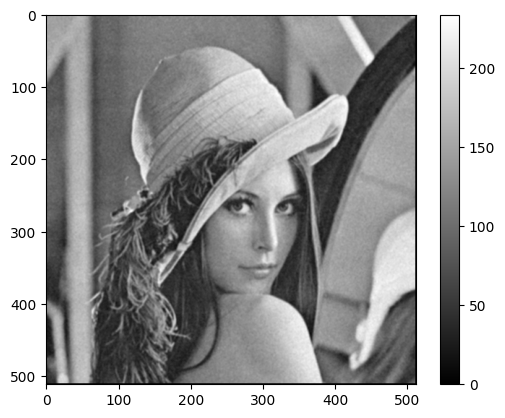

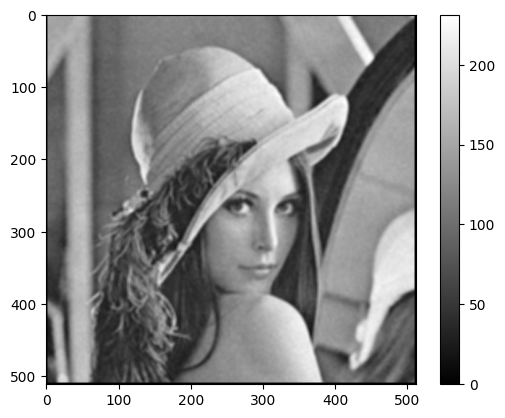

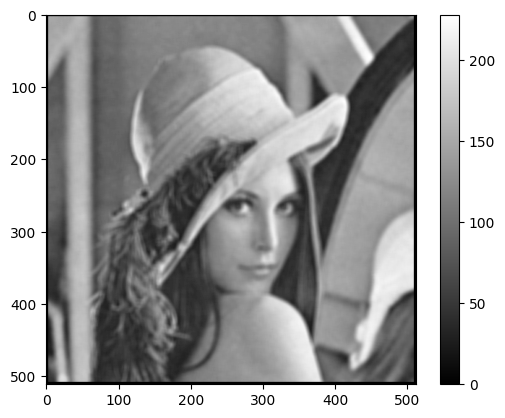

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color
    
# Read the image, convert it to gray, make it integer with values in [0, 255]

img = io.imread('lena.png')
img = color.rgb2gray(img)
img = np.uint8(img * 255)

# generate the white, gaussian noise to that image
# mean = 0, standard deviation sigma = given by the user 
sigma = 10
N = np.random.normal(0, sigma, (img.shape[0], img.shape[1]))

# add the noise over the image. 
# Take into account that the resulting image should have integer values in [0, 255] 
img_noise = img + N

# initiate the kernel
for mask_size in [3, 5, 7]: #3, 5, 7 for each neighbourhood, will display 3 images
    mask = np.ones([mask_size, mask_size]) / mask_size**2

    # initiate the output image
    h, w = img.shape
    img_filtered = np.zeros([h, w])

    for i in range(mask_size // 2, h - mask_size // 2):
        for j in range(mask_size // 2, w - mask_size // 2):
            V = img_noise[i - mask_size // 2:i + (mask_size // 2 + 1), j - mask_size // 2:j + (mask_size // 2 + 1)]
            V = V * mask
            img_filtered[i, j] = np.sum(V)
            
    plt.figure(), plt.imshow(img_filtered, cmap = 'gray'), plt.colorbar()

<h3 id="4-2"> 4.2 Smoothing filters with weighted averages </h3>
<p> The kernel of the smoothing filter can have weights that are not equal. At this exercise we will change the filtering mask. We will use the MSE (Mean Squared Error) for comparing the results for a mathematical mean filter and a filter that does smoothing with unequal weights.  </p>

<p>So, modify the code so that you do 2 separate filters: an arithmetic mean on 3x3 and a weighted mean where the current pixel's weight is bigger than the others, like the one below. <br>
[[0.075, 0.124, 0.075], <br>
 [0.124, 0.2  , 0.124], <br>
 [0.075, 0.124, 0.075]] <br>
    
For each filtered image, compute the MSE between it and the original (without noise). Which filter is better?    
</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color
import math

def filt_weighted_mean(img, mask):
    # given the input image and the kernel, return the filtered image
   img_filtered = np.zeros([h, w])

   for i in range(1, h - 1):
       for j in range(1, w - 1):
           V = img[i-1:i+2, j-1:j+2]
           V *= mask
           img_filtered[i, j] = np.sum(V)
    
    
def MSE(img, img_processed):
    # given the initial image and the processed image, return the MSE value
    mse = 0
    
    for i in img
    # in 2 for loops going from pixel to pixel compute the result
    # 1/(r*c) suma(0,r)suma(0,c) (F-F0)^2
    #  you can try to do it without the for loop (not mandatory)

    
# read the image, transform to gray and integers in [0, 255]     


# generate noise and add it to the image

# initialize the kernel
#[[0.075,0.124,0.075], [0.124,0.2,0.124], [0.075,0.124,0.075]]
kernel_weighted_mean = np.array([[0.075,0.124,0.075], [0.124,0.2,0.124], [0.075,0.124,0.075]])

kernel_aritmetic_mean = np.ones([3, 3]) / 9


# apply the 2 linear functions on the noisy image 


#compute the MSE for the 2 resulting images (compared to the ideal image)


# visualize the resulting images and print the 2 MSE
